**Run the following two cells before you begin.**

In [20]:
%autosave 10

Autosaving every 10 seconds


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
%matplotlib inline

df = pd.read_csv('Task 1 Data Set/cleaned_data.csv')

**Run the following 3 cells to create a list of features, create a train/test split, and instantiate a random forest classifier.**

In [22]:
features_response = df.columns.tolist()
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                   'EDUCATION_CAT', 'graduate school', 'high school', 'none',
                   'others', 'university']
features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df[features_response[:-1]].values,
    df['default payment next month'].values,
    test_size=0.2, random_state=24
)

In [24]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=10, criterion='gini', max_depth=3,
    min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
    max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
    min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None,
    random_state=4, verbose=0, warm_start=False, class_weight=None
)

**Create a dictionary representing the grid for the `max_depth` and `n_estimators` hyperparameters that will be searched. Include depths of 3, 6, 9, and 12, and 10, 50, 100, and 200 trees.**

In [25]:
dic={'max_depth':[3,6,9,12],'n_estimators':[10,50,100,200]}

________________________________________________________________
**Instantiate a `GridSearchCV` object using the same options that we have previously in this course, but with the dictionary of hyperparameters created above. Set `verbose=2` to see the output for each fit performed.**

In [26]:
gsc=GridSearchCV(rf,param_grid=dic,verbose=2,)

____________________________________________________
**Fit the `GridSearchCV` object on the training data.**

In [27]:
gsc.fit(X_train,y_train)

c:\users\mohak goel\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ..................... max_depth=3, n_estimators=10, total=   0.4s
[CV] max_depth=3, n_estimators=10 ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ..................... max_depth=3, n_estimators=10, total=   0.3s
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ..................... max_depth=3, n_estimators=10, total=   0.2s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   0.7s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   0.8s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   1.2s
[CV] max_depth=3, n_estimators=100 ...................................
[CV] .................... max_depth=3, n_estimators=100, total=   1.8s
[CV] max_depth=3, n_estimators=100 ...................................
[CV] .................... max_depth=3, n_estimators=100, total=   1.9s
[CV] max_depth=3, n_estimators=100 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:  2.4min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False, random_state=4,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max

___________________________________________________________
**Put the results of the grid search in a pandas DataFrame.**

In [28]:
r=pd.DataFrame(gsc.cv_results_)
r.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.267526,0.092174,0.014676,0.004790,3,10,"{'max_depth': 3, 'n_estimators': 10}",0.813388,0.824754,0.819972,0.819371,0.004660,9
1,0.835947,0.187728,0.058037,0.034654,3,50,"{'max_depth': 3, 'n_estimators': 50}",0.812122,0.820253,0.813221,0.815199,0.003602,14
2,1.676850,0.131398,0.097735,0.036652,3,100,"{'max_depth': 3, 'n_estimators': 100}",0.810997,0.819550,0.811111,0.813886,0.004005,16
3,2.610869,0.106179,0.127098,0.002176,3,200,"{'max_depth': 3, 'n_estimators': 200}",0.811419,0.819409,0.813502,0.814777,0.003384,15
4,0.244520,0.023821,0.010674,0.000944,6,10,"{'max_depth': 6, 'n_estimators': 10}",0.814653,0.823347,0.819831,0.819277,0.003571,11


**Find the best hyperparameters from the cross-validation.**

In [29]:
gsc.best_params_

{'max_depth': 6, 'n_estimators': 200}

________________________________________________________________________________________________________
**Create a `pcolormesh` visualization of the mean testing score for each combination of hyperparameters.**

<details>
    <summary>Hint:</summary>
    Remember to reshape the values of the mean testing scores to be a two-dimensional 4x4 grid.
</details>

In [30]:
# Create a 5x5 grid
xx, yy = np.meshgrid(range(5), range(5))
print(xx)
print(yy)
print(xx.shape)
print(yy.shape)

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]
[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]
 [4 4 4 4 4]]
(5, 5)
(5, 5)


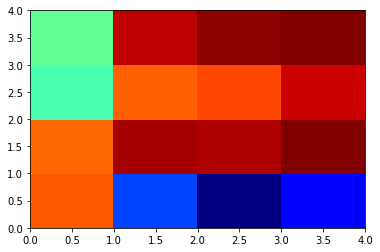

In [31]:
# Set color map to `plt.cm.jet`
p=plt.axes()
k=r['mean_test_score'].values.reshape(4,4)
p_col=p.pcolormesh(xx,yy,k,cmap=plt.cm.jet)

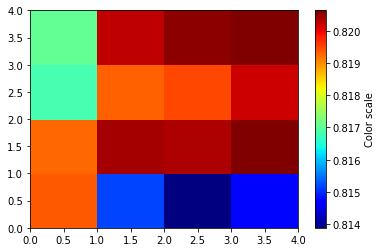

In [32]:
# Visualize pcolormesh
pcm=plt.axes()
p=pcm.pcolormesh(xx,yy,k,cmap=plt.cm.jet)
plt.colorbar(p, label='Color scale')

________________________________________________________________________________________________________
**Conclude which set of hyperparameters to use.**

In [33]:
# Create a dataframe of the feature names and importance
df_hp=pd.DataFrame({'Features':features_response[:-1],'Importance':gsc.best_estimator_.feature_importances_})
df_hp.head(5)

,Features,Importance
0,LIMIT_BAL,0.060641
1,EDUCATION,0.003056
2,MARRIAGE,0.001605
3,AGE,0.010185
4,PAY_1,0.588212


In [35]:
df_hp.sort_values(by='Importance',ascending=False)

,Features,Importance
4,PAY_1,0.588212
11,PAY_AMT1,0.064168
0,LIMIT_BAL,0.060641
12,PAY_AMT2,0.042940
13,PAY_AMT3,0.034769
6,BILL_AMT2,0.027810
14,PAY_AMT4,0.025213
5,BILL_AMT1,0.024228
7,BILL_AMT3,0.021564
15,PAY_AMT5,0.020151
